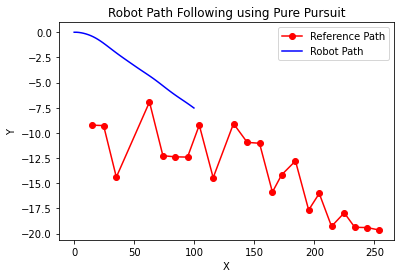

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

setofpoints = [(14.503082275390625, 20.772993087768555), (24.49747085571289, 20.730321884155273), (35.09474563598633, 15.608929634094238), (62.69521713256836, 23.07097625732422), (73.88245391845703, 17.738048553466797), (84.13788604736328, 17.624923706054688), (94.36758422851562, 17.60023307800293), (104.1479721069336, 20.776498794555664), (115.72522735595703, 15.552417755126953), (132.6474609375, 20.925451278686523), (144.0511932373047, 19.063739776611328), (154.29991149902344, 18.973447799682617), (165.0359344482422, 14.125260353088379), (172.67234802246094, 15.831439018249512), (184.22181701660156, 17.218555450439453), (195.21275329589844, 12.344099998474121), (204.01296997070312, 13.989795684814453), (214.2502899169922, 10.718965530395508), (224.83653259277344, 12.063108444213867), (233.5765380859375, 10.63058090209961), (244.1660614013672, 10.597185134887695), (253.37734985351562, 10.367303848266602)]



# Sample points defining the curve
points_x = []
points_y = []

for point in setofpoints:
    points_x.append(point[0])
    points_y.append(point[1] - 30)

# Create a smooth path using cubic spline interpolation
spline = CubicSpline(points_x, points_y)

# Robot's starting position and heading
robot_x, robot_y = 0, 0
robot_theta = 0 # 45-degree angle

# Simulation parameters
lookahead_distance = 100
dt = 0.1  # Time step
velocity = 20  # Speed of the robot

# Function to find the closest point on the spline path
def get_lookahead_point(x, lookahead_distance):
    closest_x = x + lookahead_distance
    return closest_x, spline(closest_x)

# Simulation loop
trajectory_x, trajectory_y = [robot_x], [robot_y]

for _ in range(50):  # Simulating 50 time steps
    lookahead_x, lookahead_y = get_lookahead_point(robot_x, lookahead_distance)

    # Calculate steering angle
    angle_to_target = np.arctan2(lookahead_y - robot_y, lookahead_x - robot_x)
    steering_angle = angle_to_target - robot_theta

    # Move the robot
    robot_x += velocity * np.cos(robot_theta) * dt
    robot_y += velocity * np.sin(robot_theta) * dt
    robot_theta += steering_angle * dt  # Adjust heading smoothly

    # Store trajectory
    trajectory_x.append(robot_x)
    trajectory_y.append(robot_y)

# Plot results
plt.plot(points_x, points_y, 'ro-', label="Reference Path")
plt.plot(trajectory_x, trajectory_y, 'b-', label="Robot Path")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Robot Path Following using Pure Pursuit")
plt.show()
